In [1]:
# import liblaries
#liblaries for requests
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#liblaries for ML
from scipy import stats
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression

In [2]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

req = requests.get(URL)

req.headers

{'Connection': 'keep-alive', 'Content-Length': '154500', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"d901e6fe53bcc43168991cd6d6156d10a1dc274f9088d941dfbe6520d54137fc"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': 'ABC6:3635F7:298E552:2BF0225:66430821', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Tue, 14 May 2024 06:43:45 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-fra-eddf8230141-FRA', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1715669026.649577,VS0,VE218', 'Vary': 'Authorization,Accept-Encoding,Origin', 'Access-Control-Allow-Origin': '*', 'Cross-Origin-Resource-Policy': 'cross-origin', 'X-Fastly-Request-ID': 'd394e71861834b0ead8ceb43234e8846a15af864', 'Expires': 'Tue, 14 May 2024 06:48:45 GMT', '

In [3]:
#status code
match req.status_code:
    case 200: 
        print(req)
    case 404: 
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'
print(req.status_code)

<Response [200]>
200


In [4]:
def check_status_code(req):
    match req.status_code:
        case 200:
            print ('All ok')
        case 404:
            raise Exception ('Error connect')
        case _ as e:
            print (f'unknow error: {e}')



In [5]:
check_status_code(req)

All ok


In [6]:
df = pd.read_csv(URL, sep = ',')
print(df)

      Unnamed: 0   item_id                   name       category   price  \
0              0  90420332               FREKVENS  Bar furniture   265.0   
1              1    368814              NORDVIKEN  Bar furniture   995.0   
2              2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3              3  80155205                   STIG  Bar furniture    69.0   
4              4  30180504                NORBERG  Bar furniture   225.0   
...          ...       ...                    ...            ...     ...   
3689        3689  99157902                ELVARLI      Wardrobes   750.0   
3690        3690   9158152                ELVARLI      Wardrobes  1572.0   
3691        3691  59157541                ELVARLI      Wardrobes   924.0   
3692        3692  89157573                ELVARLI      Wardrobes  2745.0   
3693        3693  69157376                ELVARLI      Wardrobes  1231.0   

         old_price  sellable_online  \
0     No old price             True   
1     No 

In [11]:
# EDA for data ikea
#коротка інформація про датафрейм
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


>**item_id** - unique number for item. Type: int64  
> **name** - name of item. Type: int64  
> **category** - category name.  Type: int64  
> **price** - price of item.  Type: float64     
> **old_price** - have or not old_price. Type: object   
> **sellable_online** - item in online market. Type: bool   
> **link** - link on item in market. Type: object   
> **other_colors** - available or not different color of item. Type: object   
> **short_description** - short info about item . Type: object   
> **designer** - designer name. Type: object    
> **depth**   - depth of item. Type: float64  
> **height** - height of item. Type: float64  
> **width**  - width of item. Type:  float64  

In [13]:
#загальна розмірність
df.shape 

(3694, 14)

In [14]:
df.head() #перші 5 записів

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [15]:
df.tail() #останні 5 записів

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [16]:
df.sample(5) #рандомні 5 записів

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1184,1184,19304006,NILSOVE / NORNA,Chairs,424.0,No old price,True,https://www.ikea.com/sa/en/p/nilsove-norna-cha...,No,Chair with chair pad,A Fredriksson/J Hultqvist/W Chong,57.0,82.0,57.0
1096,1096,428974,NORRÅKER,Café furniture,145.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-stool-bi...,No,"Stool, 45 cm",J Karlsson/N Karlsson,29.0,45.0,45.0
1670,1670,39239835,NORDLI,Chests of drawers & drawer units,460.0,SR 575,True,https://www.ikea.com/sa/en/p/nordli-chest-of-3...,Yes,"Chest of 3 drawers, 40x76 cm",Ola Wihlborg,47.0,76.0,40.0
1650,1650,430019,HEMNES,Chests of drawers & drawer units,70.0,No old price,True,https://www.ikea.com/sa/en/p/hemnes-glass-top-...,Yes,"Glass top, 54x38 cm",IKEA of Sweden,NaN,NaN,38.0
1962,1962,99262168,ÄPPLARÖ,Outdoor furniture,2576.0,No old price,True,https://www.ikea.com/sa/en/p/aepplaroe-modular...,Yes,"Modular corner sofa 3-seat, outdoor, ...",Eva Lilja Löwenhielm/K Hagberg/M Hagberg/IKEA ...,80.0,84.0,223.0


In [17]:
#  загальна інформація про дата сету
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [18]:
#розглянемо детальніше колонки
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [19]:
#перевірка на дублікати по потрібним колонкам
df.duplicated(subset=['name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'])


0       False
1       False
2       False
3       False
4       False
        ...  
3689    False
3690    False
3691    False
3692    False
3693    False
Length: 3694, dtype: bool

In [20]:
df['Unnamed: 0'].unique() 

array([   0,    1,    2, ..., 3691, 3692, 3693], dtype=int64)

In [21]:
df['item_id'].unique() 

array([90420332,   368814,  9333523, ...,  9158152, 59157541, 89157573],
      dtype=int64)

In [22]:
df['link'].unique()

array(['https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/',
       'https://www.ikea.com/sa/en/p/nordviken-bar-table-black-00368814/',
       'https://www.ikea.com/sa/en/p/nordviken-nordviken-bar-table-and-4-bar-stools-black-black-s09333523/',
       ...,
       'https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s09158152/',
       'https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s59157541/',
       'https://www.ikea.com/sa/en/p/elvarli-3-sections-white-s89157573/'],
      dtype=object)

In [23]:
#видалимо дублікати по 'item_id'
df.drop_duplicates(['item_id']).reset_index(drop=True)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,3688,89330653,PAX / MEHAMN/AULI,Wardrobes,2045.0,No old price,True,https://www.ikea.com/sa/en/p/pax-mehamn-auli-w...,No,"Wardrobe combination, 200x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,200.0
2958,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
2959,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
2960,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [24]:
#перевіримо чи видалися дублікати по 'item_id'
df.drop_duplicates(['item_id']).shape

(2962, 14)

In [25]:
#видалимо ці колонки,оскільки вони не несуть в собі важливої інформації
df = df.drop(['item_id', 'link', 'Unnamed: 0'], axis= 1)
df.columns #перевірка

Index(['name', 'category', 'price', 'old_price', 'sellable_online',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width'],
      dtype='object')

In [26]:
#неунікальні значення по конці 'category'
df.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [27]:
#неунікальні значення по конці 'category'. Перевіримо гіпотезу залежності ціни від категорій товарів
df.category.nunique()

17

In [28]:
#підрахуємо скільки продуктів по кожній категорії
df['category'].value_counts()

category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64

In [29]:
#топ 10 найбільших категорій
df_count_category=df['category'].value_counts()
print(df_count_category)



category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64


In [30]:
df_10=df['category'].value_counts()[0:10]
print(df_10)

category
Tables & desks                      612
Bookcases & shelving units          548
Chairs                              481
Sofas & armchairs                   428
Cabinets & cupboards                292
Wardrobes                           236
Outdoor furniture                   216
Beds                                208
TV & media furniture                190
Chests of drawers & drawer units    125
Name: count, dtype: int64


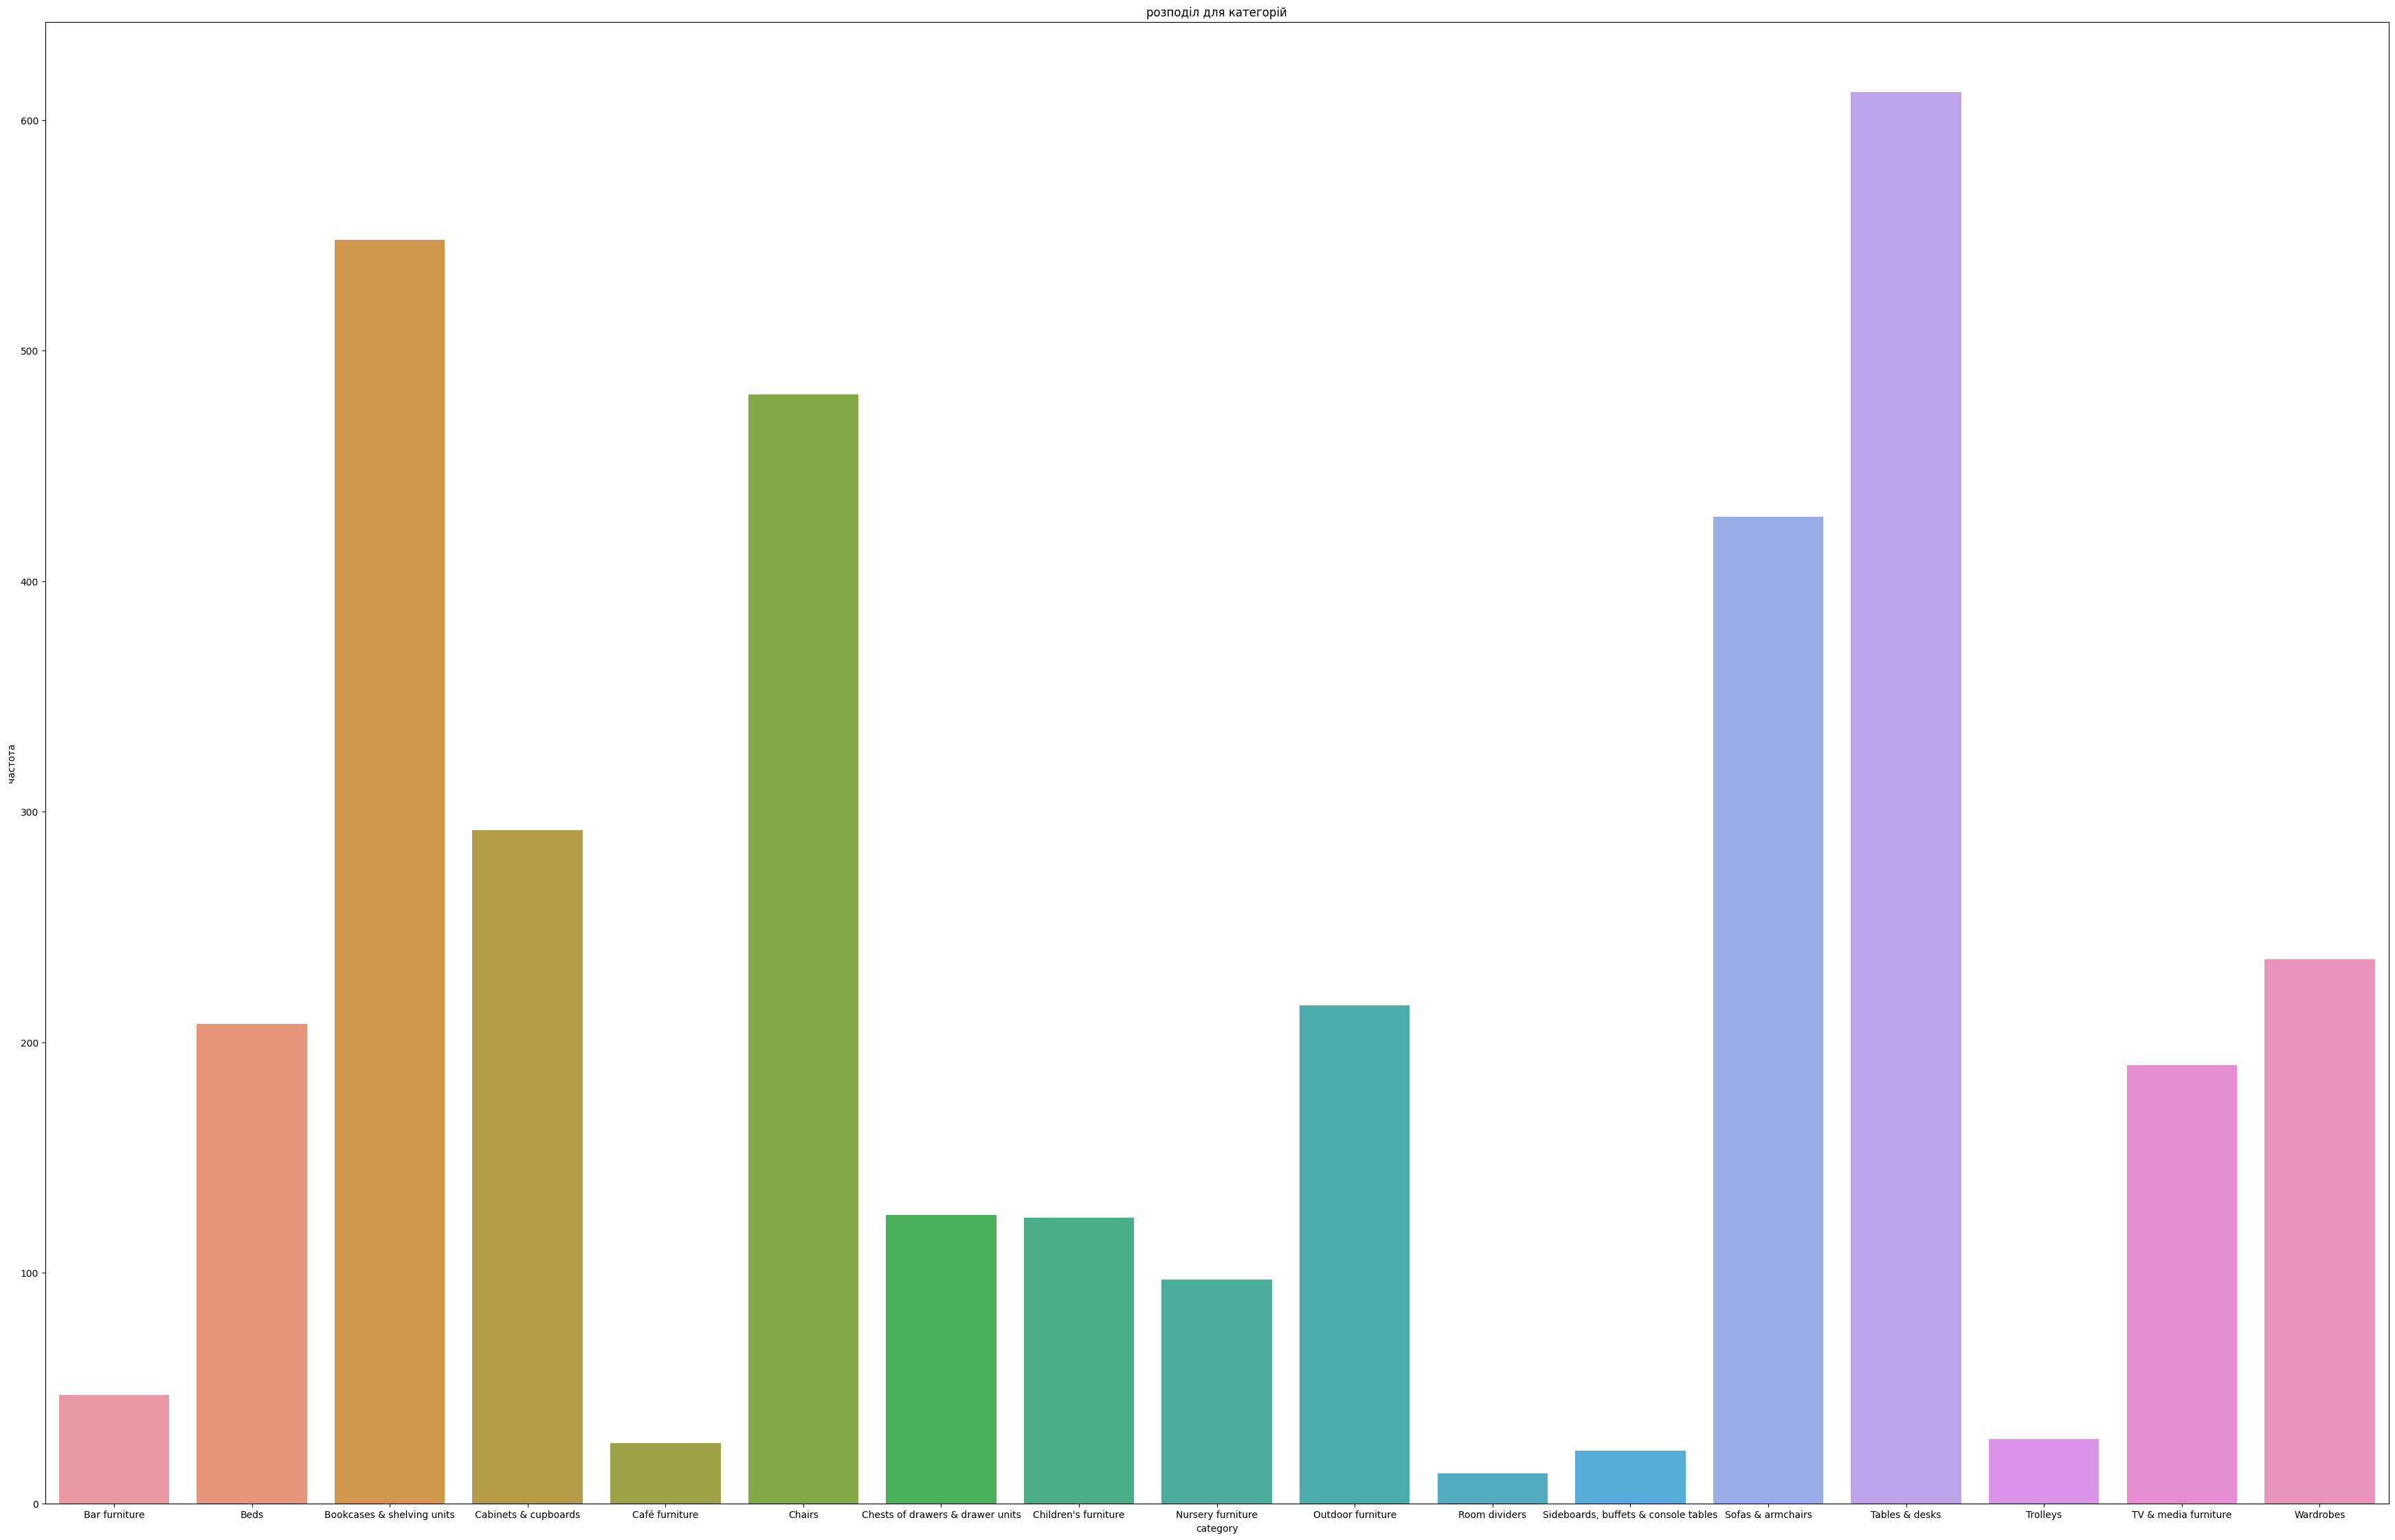

In [31]:
plt.figure(figsize=(44,28))
sns.countplot(x=df.category, data=df)
plt.title('розподіл для категорій')
plt.xlabel('category')
plt.ylabel('частота')
plt.show();


In [32]:
#графік підтвердив, що найрозповсюдженішою категорією являється 'Tables & desks',  а найменшою - 'Room dividers '

In [33]:
#подивимося на колонку 'price'
df['price'].describe() #діапозон цін від 3.0 до 9585.0

count    3694.000000
mean     1078.208419
std      1374.652494
min         3.000000
25%       180.900000
50%       544.700000
75%      1429.500000
max      9585.000000
Name: price, dtype: float64

In [144]:
df_price_category=df.groupby('category')['price'].median()
print(df_price_category) # бачимо, що найбільшу середню ціну мають категорії 'Wardrobes', 'Sofas & armchairs'

category
Bar furniture                            445.0
Beds                                    1093.5
Bookcases & shelving units               310.0
Cabinets & cupboards                     402.0
Café furniture                           424.5
Chairs                                   425.0
Chests of drawers & drawer units         460.0
Children's furniture                     202.5
Nursery furniture                        350.0
Outdoor furniture                        313.7
Room dividers                            725.0
Sideboards, buffets & console tables     965.0
Sofas & armchairs                       1268.5
TV & media furniture                     175.0
Tables & desks                           595.0
Trolleys                                 447.5
Wardrobes                               1870.0
Name: price, dtype: float64


In [145]:
#найдорожчий товар з усього асортименту
df.sort_values('price',ascending=False).max()

name                                           ÖVRARYD / JANINGE
category                                               Wardrobes
price                                                     9585.0
old_price                                                 SR 995
sellable_online                                             True
other_colors                                                 Yes
short_description            Work bench,          120x63.5x92 cm
designer                                          Wiebke Braasch
depth                                                      257.0
height                                                     700.0
width                                                      420.0
dtype: object

### Моя гіпотеза: ціна популярних категорій вища,ніж менш популярних категорій.
##### Нульова гіпотеза. - категорія товару не впливає на ціну
##### Альтернативна гіпотеза. ціна менш популярних товарів, вища ніж більш популярних



In [34]:

import unittest

import scipy.stats as stats
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from statsmodels.stats.multicomp import pairwise_tukeyhsd            
category_count=df['category'].value_counts()
sum_category=category_count.sum()
cumulative_percentage =category_count.cumsum()/sum_category

famous_category=category_count[cumulative_percentage < 0.5][::1]
print(f'категорії, які складають 50% від загальної кількості:')
print(famous_category)

категорії, які складають 50% від загальної кількості:
category
Tables & desks                612
Bookcases & shelving units    548
Chairs                        481
Name: count, dtype: int64


In [35]:
famous_category_df=df[df['category'].isin(famous_category.index)]
less_famous_category_df=df[~df['category'].isin(famous_category.index)]
print(famous_category_df.shape)
print(less_famous_category_df.shape)

(1641, 11)
(2053, 11)


In [36]:
#1) t-test to compare the average prices of two groups
t_statistic, p_value = ttest_ind(famous_category_df['price'], less_famous_category_df['price'],
                                 equal_var=False)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

famous_category_mean = np.mean(famous_category_df['price'])
less_famous_category_mean = np.mean(less_famous_category_df['price'])
difference_means = famous_category_mean - less_famous_category_mean

if difference_means > 0:
    print(''' Меблі популярних категорій дорожчі, ніж меблі менш популярних категорій. ''')
else:
    print(''' Меблі, менш популярних категорій дорожчі, ніж меблі популярних категрій. ''')

T-statistic: -7.21
P-value: 0.000
 Меблі, менш популярних категорій дорожчі, ніж меблі популярних категрій. 


In [37]:
# 2) Mann-Whitney-Wilcoxon test
statistic, p_value = mannwhitneyu(famous_category_df['price'], less_famous_category_df['price'])

print(f"Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.3f}")


Statistic: 1493141.50
P-value: 0.000


In [ ]:
# статистична різниця між двома групами категорій велика, також нульову гіпотезу, що категорія товарів не впливає на ціну , можемо відкинути, оськільки P-value: 0.000.

In [38]:
# 3) Bootstrap Test
n_bootstraps = 10000
diffs = np.empty(n_bootstraps)
for i in range(n_bootstraps):
    famous_samples = np.random.choice(famous_category_df['price'], size=len(famous_category_df), replace=True)
    less_famous_samples = np.random.choice(less_famous_category_df['price'], size=len(less_famous_category_df), replace=True)
    diffs[i] = np.mean(famous_samples) - np.mean(less_famous_samples)

p_value = np.sum(diffs >= 0) / n_bootstraps
print(f"P-value: {p_value:.3f}")

P-value: 0.000


In [ ]:
# Результат методу  бутстрепу вказує на те, що що різниця між середніми цінами популярних і менш популярних категорій  рівна нулю.

In [39]:
#4) Shuffle test
famous_prices_values = famous_category_df['price'].values
less_famous_prices_values = less_famous_category_df['price'].values

observed_diff = np.mean(famous_prices_values) - np.mean(less_famous_prices_values)

concatenated_prices = np.concatenate([famous_prices_values, less_famous_prices_values])
np.random.shuffle(concatenated_prices)

shuffled_famous_prices = concatenated_prices[:len(famous_prices_values)]
shuffled_less_famous_prices = concatenated_prices[len(famous_prices_values):]

shuffled_diff = np.mean(shuffled_famous_prices) - np.mean(shuffled_less_famous_prices)

n_permutations = 1000
null_distribution = np.zeros(n_permutations)
for i in range(n_permutations):
    np.random.shuffle(concatenated_prices)
    shuffled_famous_prices = concatenated_prices[:len(famous_prices_values)]
    shuffled_less_famous_prices = concatenated_prices[len(famous_prices_values):]
    null_distribution[i] = np.mean(shuffled_famous_prices) - np.mean(shuffled_less_famous_prices)

p_value = np.mean(np.abs(null_distribution) >= np.abs(observed_diff))

print("Observed difference in mean values: {:.2f}".format(observed_diff))
print("P-value: {:.4f}".format(p_value))

Observed difference in mean values: -316.85
P-value: 0.0000


In [ ]:
"""На основі спостережуваної середньої різниці -316,85 та p-значення 0,0000, ми можемо
відкинути нульову гіпотезу і зробити висновок, що існує значна різниця в 
між популярними та менш популярними категоріями існує значна різниця в ціні меблів. Більше того, альтернативна 
гіпотеза 2, і товари менш популярних категорій дорожчі, ніж товари більш популярних категорій. """

In [40]:
# 5) Tukey's honestly significant difference (HSD) test
famous_prices = famous_category_df['price']
less_famous_prices = less_famous_category_df['price']

tukey_results = pairwise_tukeyhsd(np.concatenate([famous_prices, less_famous_prices]),
                                  np.concatenate([['famous'] * len(famous_prices),
                                                  ['less-famous'] * len(less_famous_prices)]))

print(tukey_results.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1    group2   meandiff p-adj  lower    upper  reject
---------------------------------------------------------
famous less-famous 316.8526   0.0 228.1831 405.522   True
---------------------------------------------------------


In [ ]:
"""Нижня та верхня межі довірчого інтервалу становлять 2328.1831 та 405.522.
Оскільки довірчий інтервал не містить нуля, ми можемо відхилити нульову гіпотезу і зробити висновок
що різниця в середніх цінах між двома групами є статистично значущою на рівні 0,05 
рівні значущості"""

In [41]:
# 6) ANOVA test - analysis of variance
_, p_value = stats.f_oneway(famous_prices, less_famous_prices)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average price of furniture "
          "between popular and less famous categories.")
else:
    print("The null hypothesis could not be rejected. Significant difference in the average price of furniture "
          "there is no difference between popular and less famous categories")

Reject the null hypothesis. There is a significant difference in the average price of furniture between popular and less famous categories.


In [ ]:
# результат тесту відкидає нульову гіпотезу

In [42]:
# 7 Wilcoxon signed-rank test
min_length = min(len(famous_prices_values), len(less_famous_prices_values))
famous_prices_values = famous_prices_values[:min_length]
less_famous_prices_values = less_famous_prices_values[:min_length]

statistic, p_value = wilcoxon(famous_prices_values, less_famous_prices_values)

print("Test statistic: {:.2f}".format(statistic))
print("P-value: {:.4f}".format(p_value))

Test statistic: 572312.50
P-value: 0.0000


In [ ]:
""""результат рангового тесту Вілкоксона статистика : 572312.50 та p-значення: 0,0000 
підтвердив альтернативну гіпотезу. """

In [43]:
# 8) Wilcoxon rank-sum test
statistic, p_value = ranksums(famous_prices_values, less_famous_prices_values)

print("Test statistic: {:.2f}".format(statistic))
print("P-value: {:.4f}".format(p_value))

Test statistic: -3.89
P-value: 0.0001


In [ ]:
"""Результати критерію рангових сум Вілкоксона показують, що існує значна різниця
між цінами на меблі  популярних і менш популярних категорій. Статистика тесту становить -3.89,
а р-значення - 0,0001. Отже, ми можемо відкинути нульову гіпотезу і  підтверити альтернативну гіпотезу"""

In [44]:
# 9) Kruskal-Wallis test
statistic, p_value = kruskal(famous_category_df['price'], less_famous_category_df['price'])

print("Test statistic: {:.2f}".format(statistic))
print("P-value: {:.4f}".format(p_value))

Test statistic: 35.30
P-value: 0.0000


In [ ]:
""" Результат тесту Крускала-Уолліса статистика: 35.30, р_значення:0.0000, що відхиляє нульову гіпотезу і підтверджує альтернативну. """

In [ ]:
 ### Висновок: 
##### результати проведених тестів повністю відхиляють нульову гіпотезу і підтверджують альтернативну гіпотезу.
##### Отже, можемо стверджувати, що меблі менш популярних категорій дорожчі, ніж менш популярних. 

In [146]:
#продовжимо досліджувати колонку 'category'
#найвищі ціни по всім категоріям
df_price_max=df.groupby('category')['price'].max()
print(df_price_max)

category
Bar furniture                           2375.0
Beds                                    9585.0
Bookcases & shelving units              4335.0
Cabinets & cupboards                    6480.0
Café furniture                          1385.0
Chairs                                  6965.0
Chests of drawers & drawer units        1880.0
Children's furniture                    1545.0
Nursery furniture                       1545.0
Outdoor furniture                       5144.0
Room dividers                           2397.0
Sideboards, buffets & console tables    2100.0
Sofas & armchairs                       9585.0
TV & media furniture                    4260.0
Tables & desks                          6965.0
Trolleys                                2295.0
Wardrobes                               8380.0
Name: price, dtype: float64


<Figure size 1000x800 with 0 Axes>

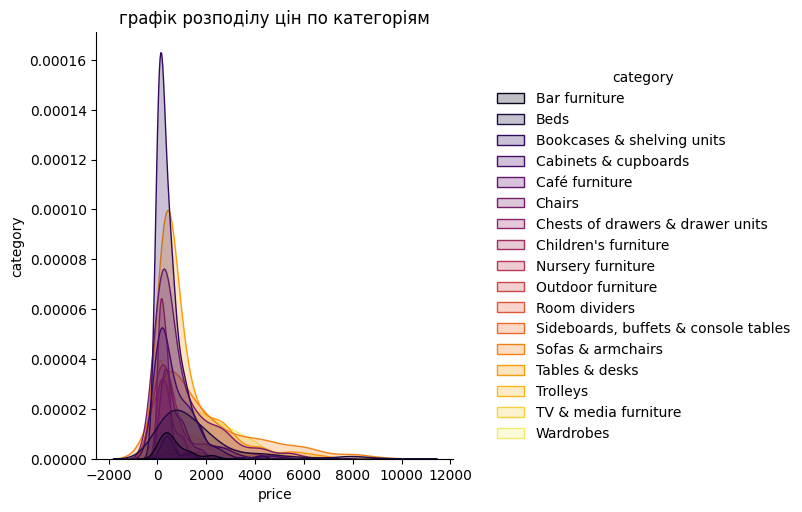

In [147]:
plt.figure(figsize=(10,8))
sns.displot(x='price', hue='category', data=df, palette= 'inferno', fill = True, kind= 'kde')
plt.xlabel('price')
plt.ylabel('category')
plt.title('графік розподілу цін по категоріям')
plt.show()


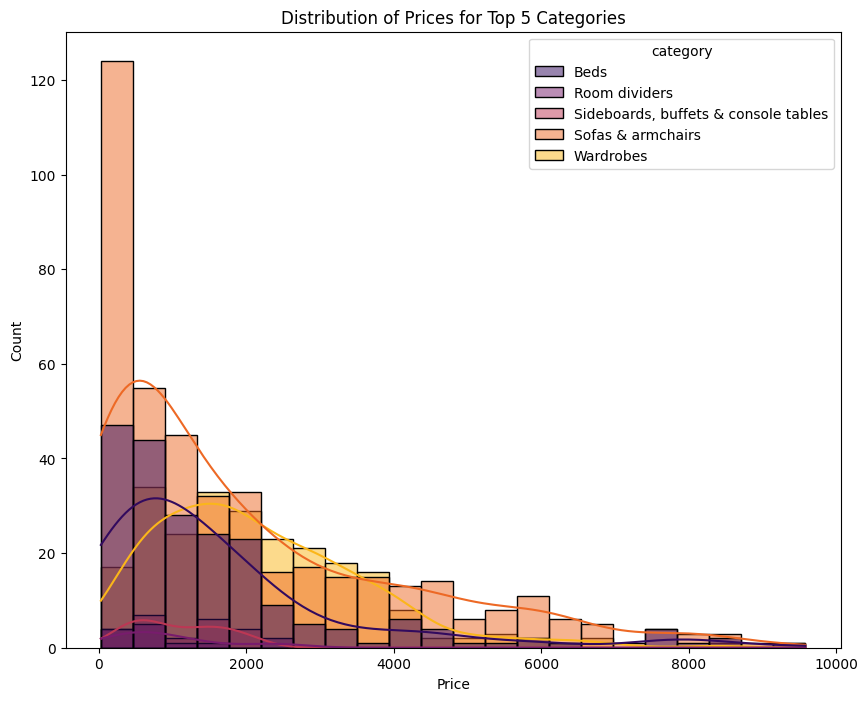

In [149]:
# Попередній візуал складно читається, тому подивимося на  ціну  для 5 дорожчих категорій за медіаною
df_price_category_top5 = df.groupby('category')['price'].median().sort_values().tail(5).index
df_top5 = df[df['category'].isin(df_price_category_top5)]

plt.figure(figsize=(10, 8))

sns.histplot(x='price', hue='category', data=df_top5, palette='inferno', fill=True, kde=True, common_norm=False)

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices for Top 5 Categories')
plt.show()

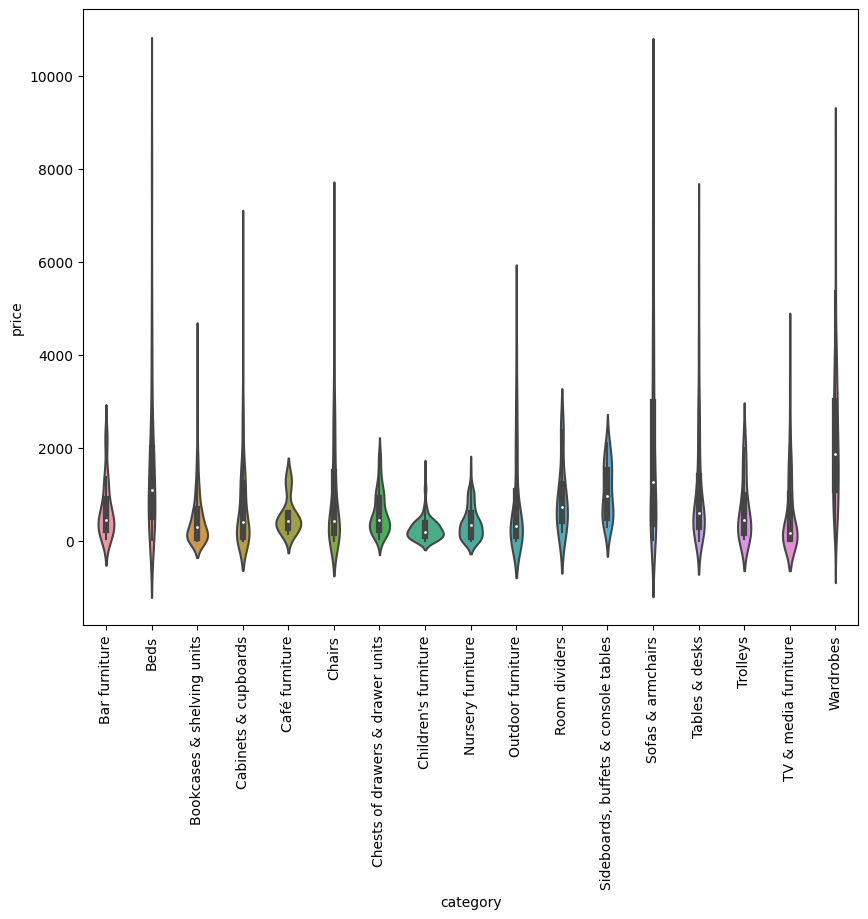

In [148]:
plt.subplots(figsize = (10,8))
sns.violinplot(data=df, x='category', y='price', rotation=45)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='price', ylabel='category'>

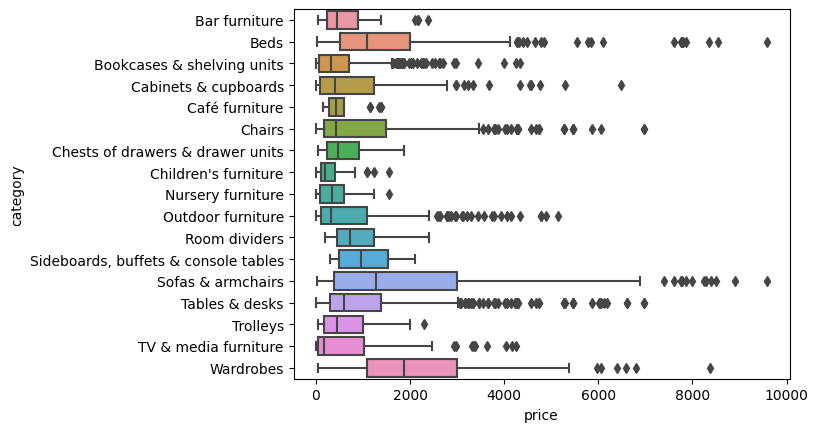

In [36]:
sns.boxplot(df, x='price', y='category' )

In [37]:
#підрахунками показали, що деякі категорії значно дорожчі за інші, але з графіків бачимо наявність викідів по ціні.

In [38]:
#подивимося на ціну по категоріям з мінімального значення
df_price_min=df.groupby('category')['price'].min()
print(df_price_min)

category
Bar furniture                            40.0
Beds                                     30.0
Bookcases & shelving units                3.0
Cabinets & cupboards                      3.0
Café furniture                          145.0
Chairs                                   11.4
Chests of drawers & drawer units         49.0
Children's furniture                      5.0
Nursery furniture                         5.0
Outdoor furniture                         9.0
Room dividers                           189.0
Sideboards, buffets & console tables    295.0
Sofas & armchairs                        27.0
TV & media furniture                      3.0
Tables & desks                            9.0
Trolleys                                 39.0
Wardrobes                                45.0
Name: price, dtype: float64


Text(0.5, 1.0, 'графік розподілу min цін по категоріям')

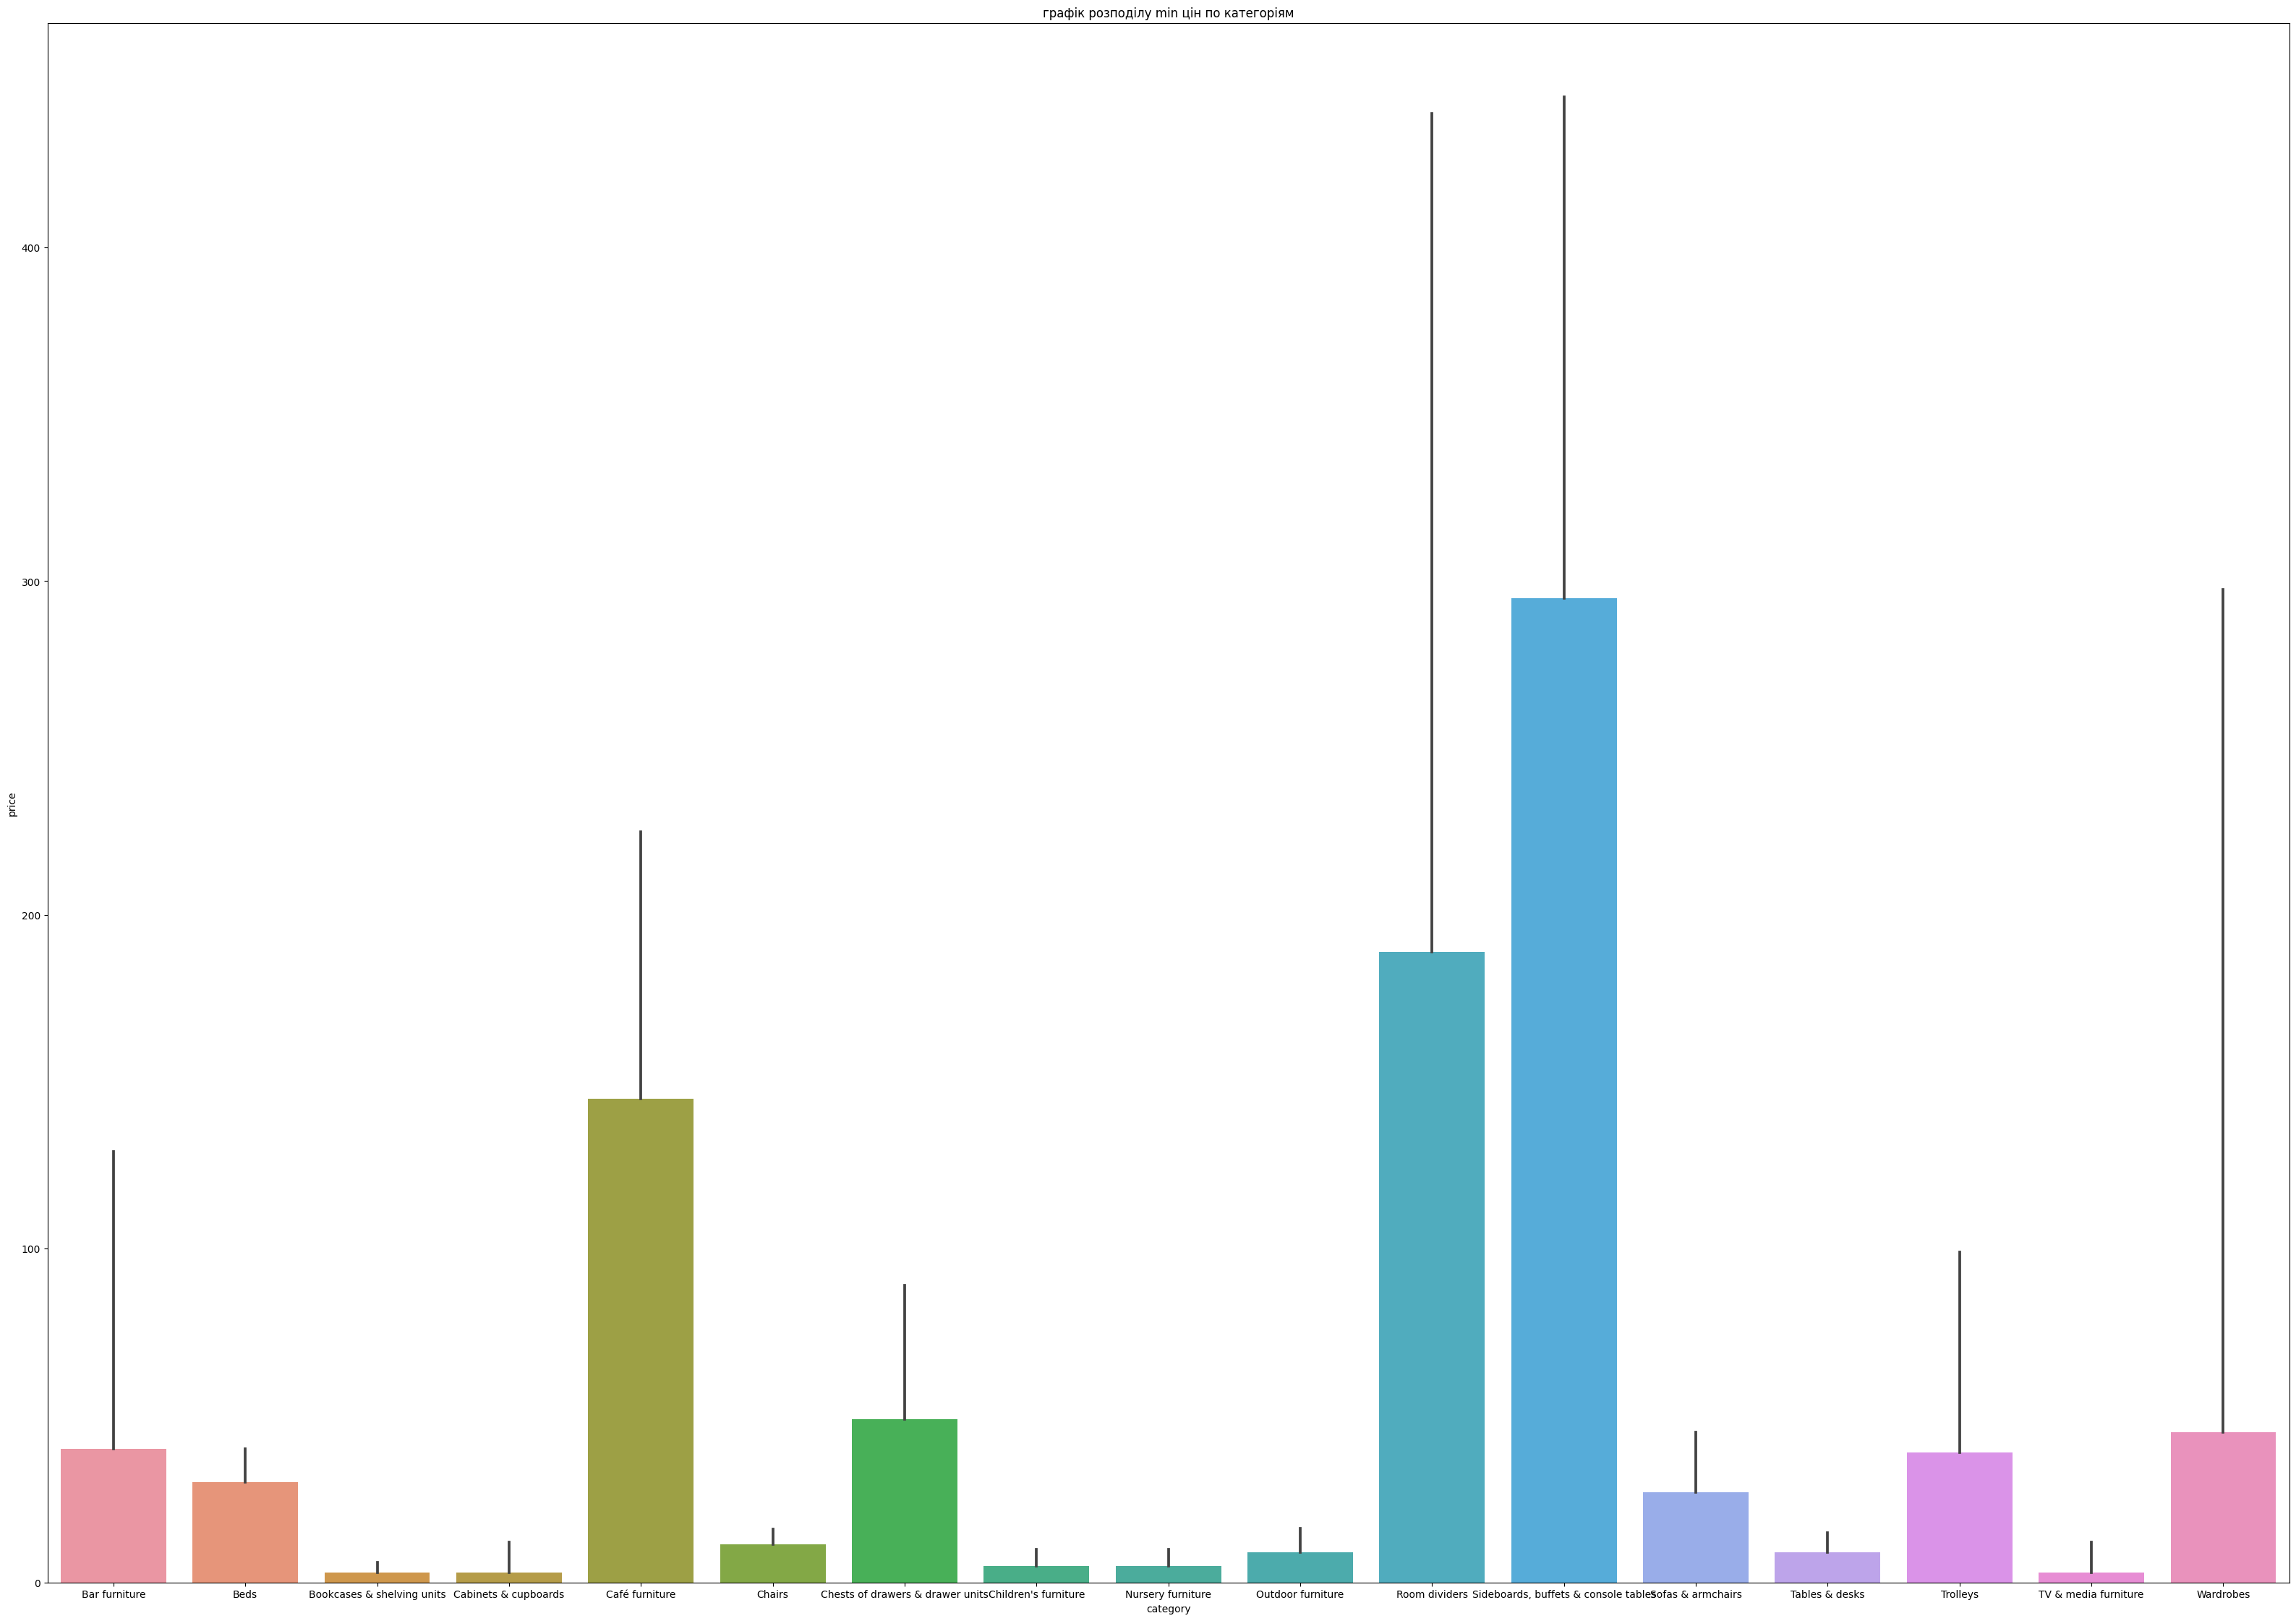

In [39]:
plt.figure(figsize=(40,28))
sns.barplot(x='category',y='price', data=df, estimator=np.min)
plt.title('графік розподілу min цін по категоріям')



In [ ]:
"""отримані результати показують, що ціни в категоріях значно різняться і наявні викиди.
 Наприклад, якщо подивитися на категорію 'beds', то там  представлений
дорогий товар з ціною 9585.00, та дешевий товар з ціною 30.0. Тому  колонку 
'price' не можемо вважати найвагомішою для ціноутворення і потрібно детальніше
дослідити інші колонки"""

In [40]:
# подивимося на колонку 'sellable_online'	
df['sellable_online'].value_counts() #28 товарів не продаються онлайн

sellable_online
True     3666
False      28
Name: count, dtype: int64

In [41]:
#товари,які не продаються онлайн
df[df['sellable_online']==False] 
# в основному це товари,які не мають старої ціни, або ж які мають старий id, тому припускаємо, що це старі товари та товари,які розкупили

,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
36,NORDVIKEN,Bar furniture,275.0,No old price,False,No,"Bar stool with backrest, 75 cm",Francis Cayouette,47.0,101.0,40.0
52,SLÄKT,Beds,540.0,No old price,False,No,"Ext bed frame with slatted bed base, ...",IKEA of Sweden/Ebba Strandmark,NaN,NaN,91.0
160,SLÄKT,Beds,520.0,No old price,False,No,"Ext bed frame with slatted bed base, ...",Ebba Strandmark/IKEA of Sweden,NaN,NaN,91.0
223,SLÄKT,Beds,75.0,No old price,False,Yes,Headboard,Ebba Strandmark,NaN,40.0,90.0
618,HACKÅS,Bookcases & shelving units,50.0,No old price,False,No,"Handle, 300 mm",J Löfgren/J Pettersson,18.0,NaN,24.0
1036,HACKÅS,Cabinets & cupboards,50.0,No old price,False,No,"Handle, 300 mm",J Löfgren/J Pettersson,18.0,NaN,24.0
1434,NORDVIKEN,Chairs,275.0,No old price,False,No,"Bar stool with backrest, 75 cm",Francis Cayouette,47.0,101.0,40.0
1503,VOLFGANG,Chairs,175.0,No old price,False,No,Stool,704.655.38 You sit comfortably thanks to the r...,43.0,85.0,53.0


In [42]:
#поглянемо на колонку 'other_colors'
df['other_colors'].describe()

count     3694
unique       2
top         No
freq      2182
Name: other_colors, dtype: object

In [43]:
df_colors=df.groupby('other_colors')['price'].mean()
print(df_colors)

other_colors
No      983.335518
Yes    1215.121561
Name: price, dtype: float64


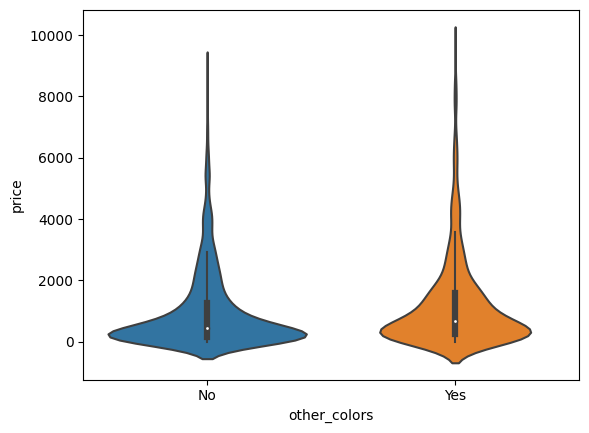

In [115]:
sns.violinplot(data = df, y = 'price', x = 'other_colors')
plt.show()

In [45]:
#Створимо нову колонку для наявності додаткових кольорів
df['other_colors_1'] = df['other_colors'].map(dict(Yes=1, No=0))
df = df.reset_index()
df.head()


,index,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,other_colors_1
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0


<Axes: xlabel='price', ylabel='Density'>

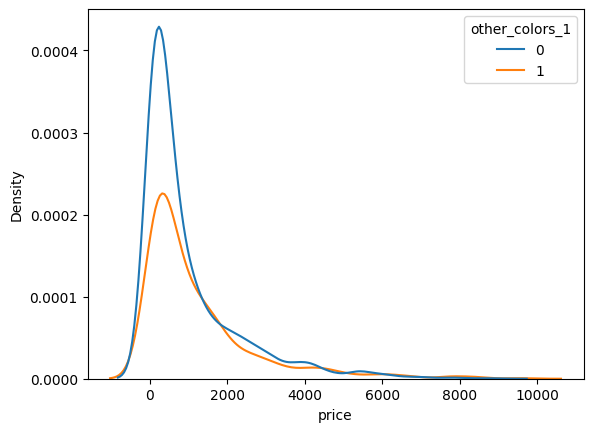

In [46]:
sns.kdeplot(data=df, x='price', hue='other_colors_1')

In [ ]:
#можемо стверджувати, що ціна товарів без варіацій кольорів вища, ніж для товарів в одному кольорі. Це може бути пов'язано з меншими затратами на вироництво товарів однієї моделі в різних кольорах. Необхідно взяти більшу кількість параметрів для дослідження.

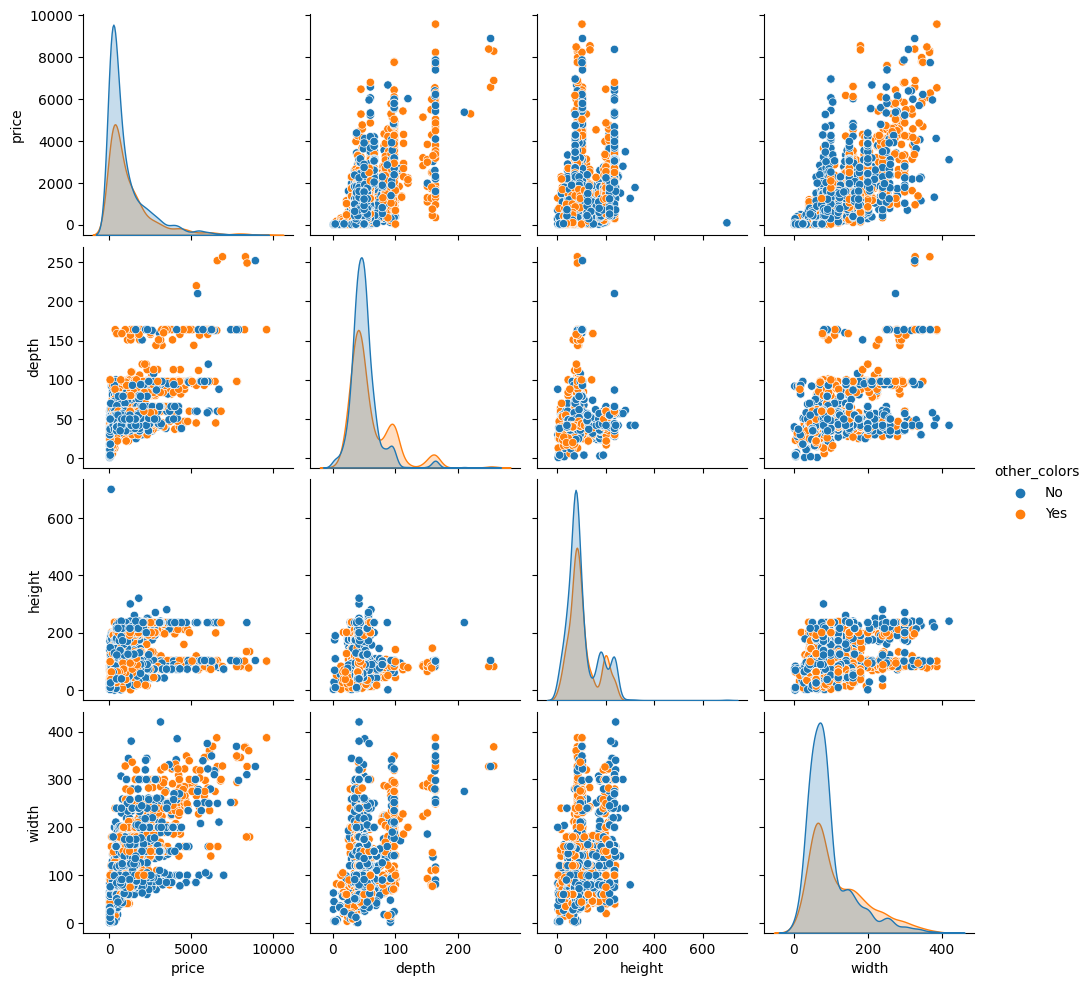

In [47]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors');

In [ ]:
#цікавими параметрами для ціноутворення виявилися ширина,висота,глибина

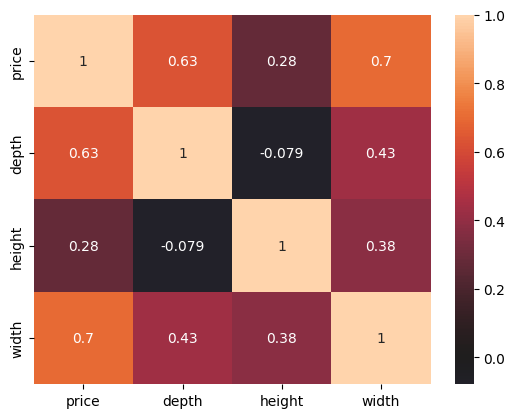

In [123]:
#поглянемо на теплову карту
sns.heatmap(df[['price', 'depth', 'height', 'width']].corr(), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

In [ ]:
#теплова карта свідчить про взаємозв'язок 'price' i 'width', 'depth','height'

In [8]:
#теплова карта Спірмена
df_X = df[['height', 'width', 'depth', 'price']]

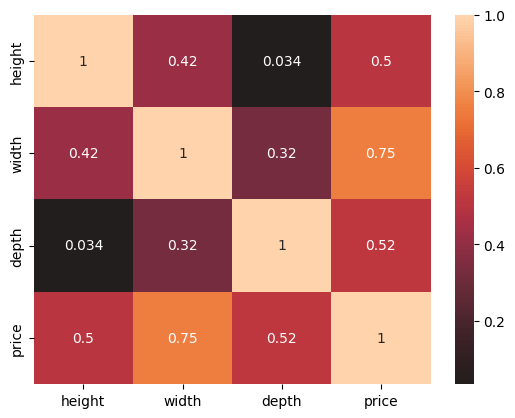

In [9]:
sns.heatmap(df_X.corr(method= 'spearman'), xticklabels= df_X.corr().columns,
            yticklabels= df_X.corr().columns, center= 0, annot= True);

In [ ]:
#результат кореляції Спірмена показує,що лінійна залежність між ціною і шириною, ціною і висотою дещо більша, ніж в попередньому випадку

In [48]:
#розглянемо колонку 'designer'
df['designer'].describe()

count               3694
unique               381
top       IKEA of Sweden
freq                 828
Name: designer, dtype: object

In [40]:
df['designer'].unique() #потрібно вичистити дані

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

In [150]:
#створимо функцію для очищення колонки 'designer'
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value
    
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    
    designers = value.split("/")
    
    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [151]:
ikea_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

ikea_df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [78]:
ikea_df['designer_clean'].head()

0    Nicholai Wiig Hansen
1       Francis Cayouette
2       Francis Cayouette
3           Henrik Preutz
4          Marcus Arvonen
Name: designer_clean, dtype: object

In [152]:
ikea_df['designer_clean'].value_counts()

designer_clean
IKEA of Sweden                                                     971
Ehlén Johansson                                                    161
Francis Cayouette                                                  151
Ehlén Johansson/IKEA of Sweden                                     145
Ola Wihlborg                                                       134
                                                                  ... 
Eva Lilja Löwenhielm/IKEA of Sweden/Jon Karlsson                     1
A Huldén/S Dahlman                                                   1
Ehlén Johansson/Fredriksson/Hilland/IKEA of Sweden/L Löwenhielm      1
Malin Unnborn                                                        1
Lars Norinder                                                        1
Name: count, Length: 199, dtype: int64

In [153]:
designer_df_max=ikea_df.groupby('designer_clean')['price'].max()
print(designer_df_max)

designer_clean
A Fredriksson/H Preutz                                   75.0
A Fredriksson/HAY/J Hultqvist/W Chong                  2575.0
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong        675.0
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong         889.0
A Fredriksson/J Hultqvist/Mikael Warnhammar/W Chong    2575.0
                                                        ...  
Tina Christensen                                       2585.0
Tom Dixon                                              3900.0
Tord Björklund                                         1195.0
Virgil Abloh                                            837.0
Wiebke Braasch                                          575.0
Name: price, Length: 199, dtype: float64


In [ ]:
#найдорожчий товар у дизайнера Tom Dixon

In [154]:
designer_df=ikea_df.groupby('designer_clean')['price'].mean()
print(designer_df)

designer_clean
A Fredriksson/H Preutz                                   35.900000
A Fredriksson/HAY/J Hultqvist/W Chong                  2575.000000
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong        675.000000
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong         889.000000
A Fredriksson/J Hultqvist/Mikael Warnhammar/W Chong    2575.000000
                                                          ...     
Tina Christensen                                        916.190476
Tom Dixon                                              1396.136364
Tord Björklund                                          536.129032
Virgil Abloh                                            501.600000
Wiebke Braasch                                          410.000000
Name: price, Length: 199, dtype: float64


In [ ]:
#середня ціна також вища у дизайнера Tom Dixon

In [155]:
#top 10 найпоширеніших дизайнерів
designer_df_top10=ikea_df['designer_clean'].value_counts()[0:10]
print(designer_df_top10)

designer_clean
IKEA of Sweden                    971
Ehlén Johansson                   161
Francis Cayouette                 151
Ehlén Johansson/IKEA of Sweden    145
Ola Wihlborg                      134
K Hagberg/M Hagberg               122
Jon Karlsson                      120
Carina Bengs                       75
Henrik Preutz                      70
Studio Copenhagen                  64
Name: count, dtype: int64


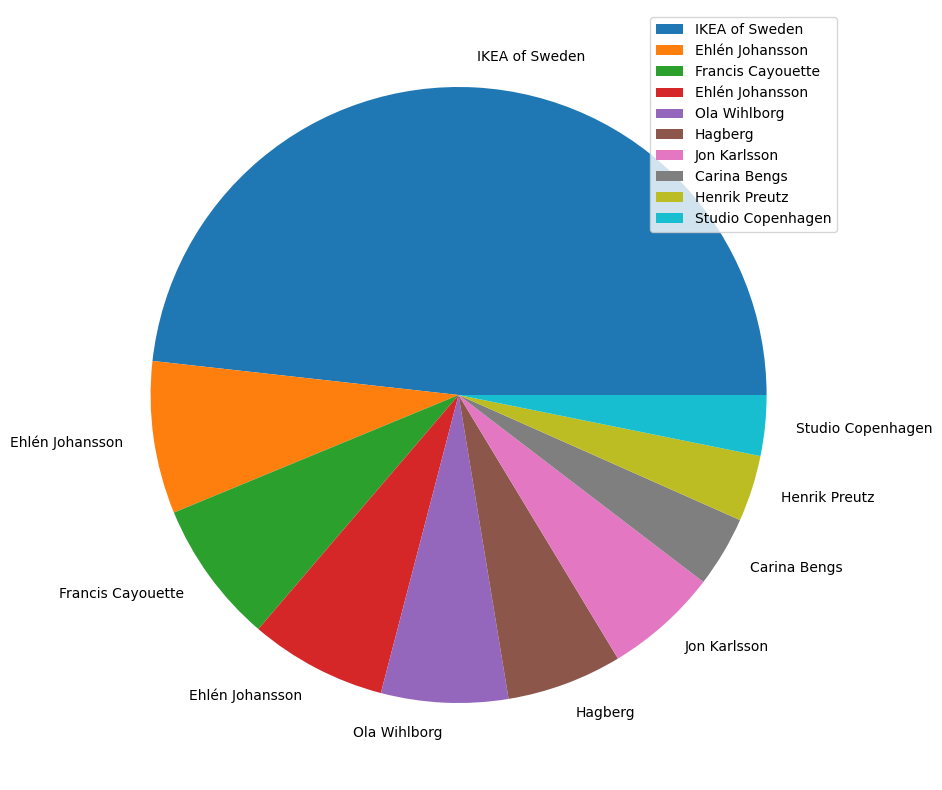

In [83]:
#візуалізуємо найпоширеніших дизайнерів
fig,ax=plt.subplots(figsize=(10,10))
y=designer_df_top10
mylabels=['IKEA of Sweden', 'Ehlén Johansson', 'Francis Cayouette', 'Ehlén Johansson','Ola Wihlborg', 'Hagberg', 'Jon Karlsson', 'Carina Bengs', 'Henrik Preutz', 'Studio Copenhagen']                                  
ax.pie(y, labels=mylabels)
plt.legend()
plt.show()

<Axes: xlabel='price', ylabel='designer_clean'>

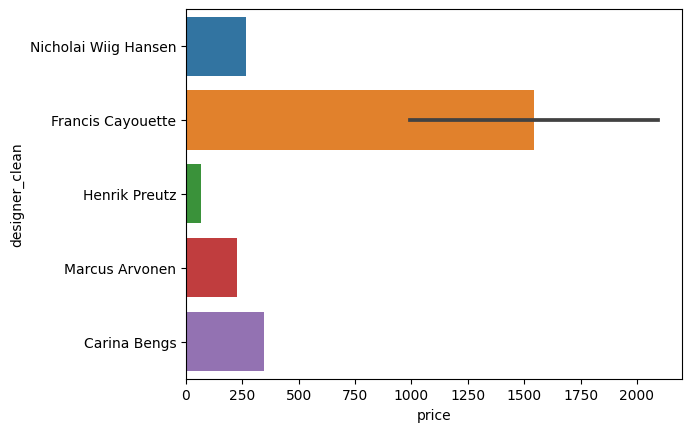

In [89]:
#залежність ціни від дизайнерів
ikea_df1=ikea_df[0:6] # візьмемо перших п'ять дизайнерів
sns.barplot(x='price', y='designer_clean', data=ikea_df1)

In [156]:
#перевірка на нульові значення
ikea_df.isnull()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_clean
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3690,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3691,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3692,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [157]:
#підрахуємо кількість нульових значень
ikea_df.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
designer_clean          0
dtype: int64

In [59]:
#нульові значення присутні в трьох колонках: 'depth','height', 'width '           
               

### Pipeline 
##### розіб'ємо даніна  80% для навчання, 20% для тестування. 
##### кількісні дані зповнимр медіаною
##### категоріальні дані -заповнимо найбільш зустрічаємими
##### використаємо модель DecisionTreeRegressor

In [92]:
X = ikea_df[['depth', 'width', 'height', 'category','designer_clean', 'other_colors']]
Y = ikea_df['price']

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)

#  інші метрики для  моделі
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036


In [71]:
dtr

Pipeline(steps=[('col_prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['depth', 'width', 'height']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['category', 'designer_clean',
                                                   'other_colors'])])),
                ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))])

In [158]:
#запонимо дані в ручну,інший варіант
median_d = ikea_df.groupby(['category'])['depth'].median()
median_h = ikea_df.groupby(['category'])['height'].median()
median_w = ikea_df.groupby(['category'])['width'].median()

median_price = ikea_df.groupby(['category'])['price'].median()
median_dsgn =  ikea_df.groupby(['designer_clean'])['price'].median()

ikea_df = ikea_df.set_index(['category'])
ikea_df['depth_1'] = ikea_df['depth'].fillna(median_d)
ikea_df['height_1'] = ikea_df['height'].fillna(median_h)
ikea_df['width_1'] = ikea_df['width'].fillna(median_w)
ikea_df['category_median_price'] = median_price

ikea_df = ikea_df.reset_index()

ikea_df = ikea_df.set_index(['designer_clean'])
ikea_df['designer_median_price'] = median_dsgn
ikea_df = ikea_df.reset_index()
ikea_df.head()

,designer_clean,category,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,60.0,43.0,74.0,445.0,150.0


In [115]:
#Використаємо такі моделі:KNeighborsRegressor,DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor та визначимо найкращу
#створимо функцію 

def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}

    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
        
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [165]:
X1 = ikea_df[['depth_1', 'width_1', 'height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.70668,387.12433,738.68876
GradientBoostingRegressor,0.65379,476.37416,802.53323
KNeighborsRegressor,0.59817,512.19659,864.59519
DecisionTreeRegressor,0.57666,471.35355,887.43536
LinearRegression,0.37200,677.86675,1080.87036
RidgeCV,0.37200,677.86678,1080.87039
LassoCV,0.37192,677.94341,1080.93750
SVR,0.33517,642.82113,1112.10644


In [ ]:
# Модель RandomForestRegressor показала найкращий результат серед інших

In [76]:
#Застосуємо GridSearchCV для RandomForestRegressor та налаштуємо гіперпараметри
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,30,60,100, 130, 160,200], 
                                                     'max_depth': [10,30,50,70,100,150,180,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

c:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
315 fits failed out of a total of 945.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
147 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Python3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Python3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter

Best Estimator : RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=130)
Best Score     : 0.7785507573831985

R^2            : 0.75225
MAE            : 371.51529
RMSE           : 691.04014

Feature importance:
--------------------------------
0.51693    width_1
0.26712    depth_1
0.21595    height_1


<Axes: >

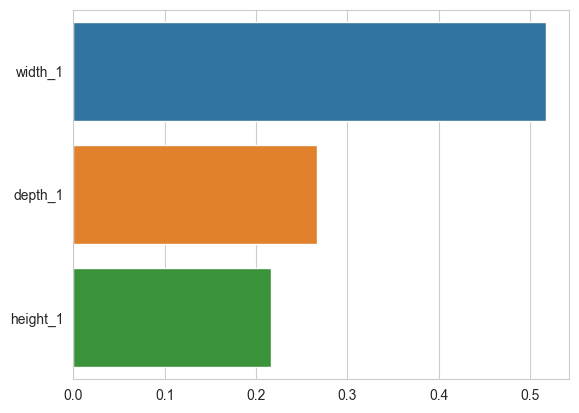

In [79]:
# візуалізація для RandomForestRegressor
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

In [197]:
#Застосуємо GridSearchCV для DecisionTreeRegressor та налаштуємо гіперпараметри
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
decision_grid = GridSearchCV(DecisionTreeRegressor(), {'max_depth': [10,30,50,70,100,150,180,200,None]})
decision_grid.fit(X_train, Y_train)
 
print('Best Estimator :',decision_grid.best_estimator_)
print('Best Score     :',decision_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, decision_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(decision_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(decision_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, decision_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : DecisionTreeRegressor(max_depth=50)
Best Score     : 0.6902616957487562

R^2            : 0.68348
MAE            : 403.26277
RMSE           : 781.08530

Feature importance:
--------------------------------
0.20472    depth_1
0.62396    width_1
0.17131    height_1


<Axes: >

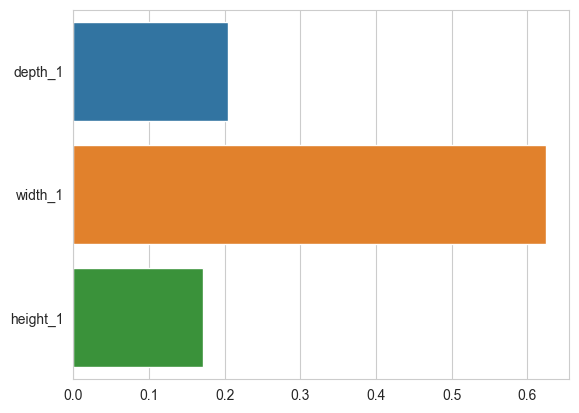

In [198]:
# візуалізація для DecisionTreeRegressor
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=decision_grid.best_estimator_.feature_importances_)

##### Проаналізувавши дані з датафрейму ikea,отримали, що найбільш впливовими колонками для формування цін є:
##### 'width', 'depth', 'height'. 
##### При цьому значення вагових  коефіцієнтів таке:
##### для width - 0.54182   
##### для depth - 0.24238
##### для height - 0.21581
##### Використали такі регресійні моделі:KNeighborsRegressor,DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor.
##### Найкращою моделлю виявилась  RandomForestRegressor. 
##### Найкращий параметр для глибини дерева (max_depth) - 150, кількість ознак для кожного розбиття (max_features) - 'sqrt' та кількість дерев  - 130. Best Score :0.7783586366002605
##### R^2 (коефіцієнт детермінації)=0.75437. Він вказує, який відсоток мінливості залежної змінної може бути пояснений з використанням предикторів.
##### MAE=370.24620 вимірює середню абсолютну помилку між фактичними значеннями та передбаченими значеннями моделі.
##### RMSE=688.08288 (Root Mean Squared Error) є середньоквадратичною похибкою між прогнозованими і фактичними значеннями.





In [160]:
#змінимо розбивку даних на 70% для навчання та 30% для тестування і подивимося на результат

def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}

    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
        
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res







In [163]:
X1 = ikea_df[['width_1','depth_1','height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.70651,387.30045,738.90801
GradientBoostingRegressor,0.65388,476.34510,802.42266
KNeighborsRegressor,0.59817,512.19659,864.59519
DecisionTreeRegressor,0.57658,471.56905,887.51683
LinearRegression,0.37200,677.86675,1080.87036
RidgeCV,0.37200,677.86678,1080.87039
LassoCV,0.37192,677.94324,1080.93897
SVR,0.33517,642.82113,1112.10644


In [72]:
#Застосуємо GridSearchCV та змінимо параметри
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.3, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,50, 100, 150,200, 300, 500], 
                                                     'max_depth': [30,70,100,180,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

c:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Python3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Python3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_

Best Estimator : RandomForestRegressor(max_depth=180, max_features='sqrt', n_estimators=300)
Best Score     : 0.7630456039329229

R^2            : 0.71697
MAE            : 381.64977
RMSE           : 725.62349

Feature importance:
--------------------------------
0.54229    width_1
0.23794    depth_1
0.21977    height_1


##### Змінивши кількісне відношення розбивки даних та параметри, отримали:
##### найкращою регресійною моделлю залишилась RandomForestRegressor
##### для розбивки даних 80% на 20% показники такі:
##### max_depth=50, max_features='log2', n_estimators=130,  Best Score: 0.7783586366002605
##### R^2: 0.75437, MAE: 370.24620, RMSE: 688.08288
##### width:0.54182, depth:0.24238, heigth:0.21581

##### для розбивки даних 70% на 30% показники такі:
##### max_depth=180, max_features='sqrt', n_estimators=300, Best Score: 0.7630456039329229
##### R^2: 0.71697, MAE: 381.64977, RMSE: 725.62349
##### width:0.54229, depth:0.23794, heigth:0.21977
##### отримані результати вказують на те, що перший варіант розбивки даних і налаштування параметрів більш ефективний.





In [172]:
# Cross_Validation for KNeighborsRegressor
X = ikea_df[['width_1','depth_1','height_1']]
Y = ikea_df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
n_neighbors = {'n_neighbors': [i for i in range(1, 50)]}

%timeit
model = KNeighborsRegressor()
grid_search = GridSearchCV(model, n_neighbors, cv=5, n_jobs= -1)
grid_search.fit(X_train, Y_train)

print("Best value for k:", grid_search.best_params_['n_neighbors'])
print("Accuracy:", grid_search.best_score_)

Best value for k: 3
Accuracy: 0.6951057736544781


In [187]:
# Cross_Validation for RandomForestRegressor
start = datetime.datetime.now()
parameters = {'n_estimators': [10, 20, 30, 50],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']
              }

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, parameters, cv = 5, n_jobs= -1 )
grid_search.fit(X_train, Y_train)

end = datetime.datetime.now()
print(end - start )
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

c:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
171 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Python3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Python3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramete

0:00:27.102673
Best Parameters:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Best Score:  0.7768399594402146
